# <p style="background-color:#00918F;font-family:Segoe UI Semibold;color:#FFFFFF;font-size:120%;text-align:center;border-radius:2px 2px;">ANÁLISE DE SEGMENTAÇÃO DE CLIENTES - PYTHON </p>

### <font color='#00918'>  Customer Personality Analysis </font>
  O objetivo desta clusterização é de segmentar clientes com base em suas características a fim de proporcionar uma melhor tomada de decisão nos negócios. 
 
  Novas campanhas de Marketing, por exemplo, poderão ser direcionadas a clientes específicos, cujas características sejam agrupadas e identificadas por meio do modelo de Aprendizagem Não Supervisionada.

Dataset: *https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis*

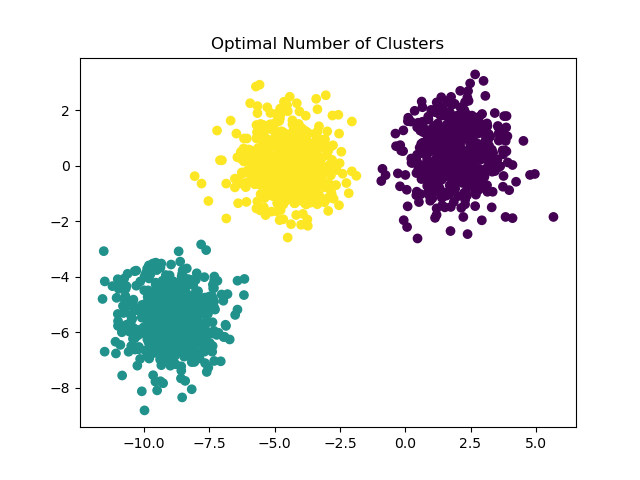

In [1]:
### Exemplo de Clusterização com o Algoritmo KMeans

from IPython.display import Image
Image("https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_003.png", 
     width = 600,
     height = 600)

#### Atributos do Dataset



**People**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**
Need to perform clustering to summarize customer segments.

### 1. Início

#### 1.1 Import das Bibliotecas

In [2]:
# Manipulação

import pandas as pd
import numpy as np

# Visualização

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Modelo

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Pré-Processamento

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### 1.2 Leitura do dataset

In [3]:
# Carga dos dados

data = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv',
                  sep = "\t")

#### 1.3 Definição de funções utilizadas

In [4]:
def print_shape(df):
    print('Shape do dataset (linhas, colunas): ' + str(df.shape))

def count_plot(df, col, title = None):
    plt.figure(figsize = (10,6))
    sns.countplot(x = df[col], palette = 'Purples', orient = 'h')
    plt.suptitle('Plot da variável: {}'.format(col), fontsize = 'large', fontweight = 'bold')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()
    
    
def plot_hist(df, col, title = None, hue = None):
    plt.figure(figsize=(12,6))
    sns.histplot(x = df[col],  color = 'purple', kde = True, hue = hue)
    plt.suptitle('Histograma da variável: {}'.format(col), fontsize = 'large', fontweight = 'bold')
    plt.title(title)
    plt.ylabel('Frequência')
    plt.show()

### 2. Análise Exploratória do dataset (EDA)

#### 2.1 Visualização dos primeiros registros


In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Shape (formato) do dataset

print_shape(data)

Shape do dataset (linhas, colunas): (2240, 29)


#### 2.2 Distribuição dos 'tipos' das variáveis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Plot da distribuição dos tipos das variáveis

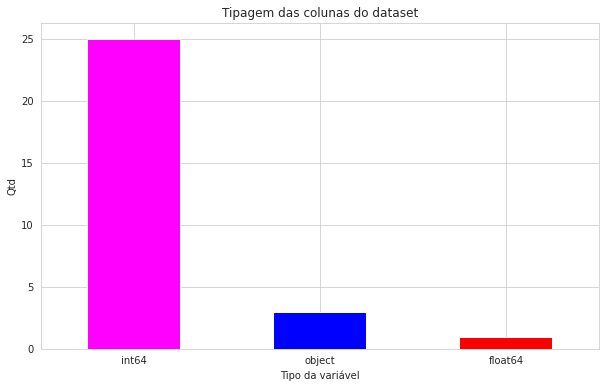

In [8]:
data.dtypes.value_counts().plot(kind = 'bar',
                               title = 'Tipagem das colunas do dataset',
                               xlabel = 'Tipo da variável',
                               ylabel = 'Qtd',
                               rot = 0, # Rotação do label no eixo x, evita que o texto fique na vertical.
                               figsize = (10,6),
                               color = ['magenta','blue','red'])
plt.show()

In [9]:
# Variáveis não numéricas: mais a frente, com execação da data, deveremos aplicar alguma técnica
# de transformação (Label Encoding ou One Hot Encoding?)

data.select_dtypes('object')

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


#### 2.3 Descrição Estatística das variáveis

In [10]:
data.describe().T # .T = Transposta da Matriz

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


#### 2.4 Missing Values (valores ausentes)

income: 24 registros vazios

Income: Customer's yearly household income

In [11]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Plot Missing Values

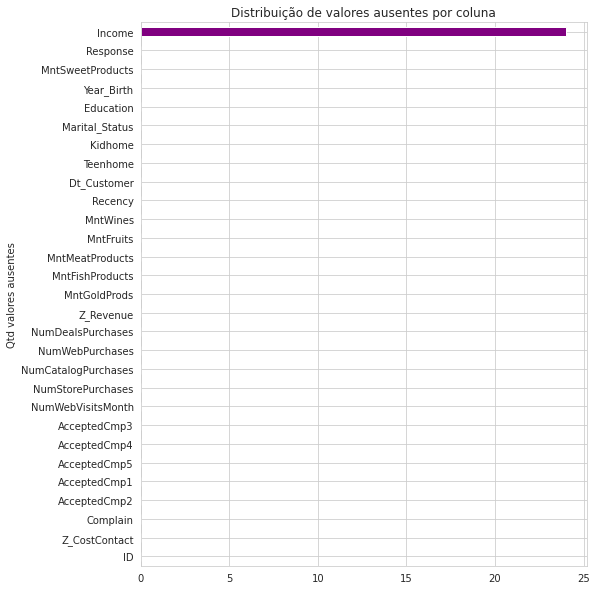

In [12]:
plt.figure(figsize=(8,10))
data.isnull().sum().sort_values(ascending = True).plot(kind = 'barh', 
                                                       color = 'purple',
                                                       title = 'Distribuição de valores ausentes por coluna',
                                                       xlabel = 'Qtd valores ausentes',
                                                       ylabel = 'Colunas/Features')
plt.show()


In [13]:
# Visualizando os registros vazios

data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [14]:
## Dentro das possibilidades, optou-se por dropar os registros com valores ausentes.

data.dropna(axis = 0, how = 'any', inplace = True)

In [15]:
# Verificando, novamente, o shape do dataset

print_shape(data)

Shape do dataset (linhas, colunas): (2216, 29)


#### 2.5 Registros Duplicados

In [16]:
print('Existe(m) %d registros duplicados' % data.duplicated().sum())

Existe(m) 0 registros duplicados


#### 2.6 Valores únicos por coluna (cardinalidade)


In [17]:

data.nunique().sort_values(ascending = False)

ID                     2216
Income                 1974
MntWines                776
Dt_Customer             662
MntMeatProducts         554
MntGoldProds            212
MntFishProducts         182
MntSweetProducts        176
MntFruits               158
Recency                 100
Year_Birth               59
NumWebVisitsMonth        16
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
Marital_Status            8
Education                 5
Teenhome                  3
Kidhome                   3
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Z_CostContact             1
Z_Revenue                 1
dtype: int64

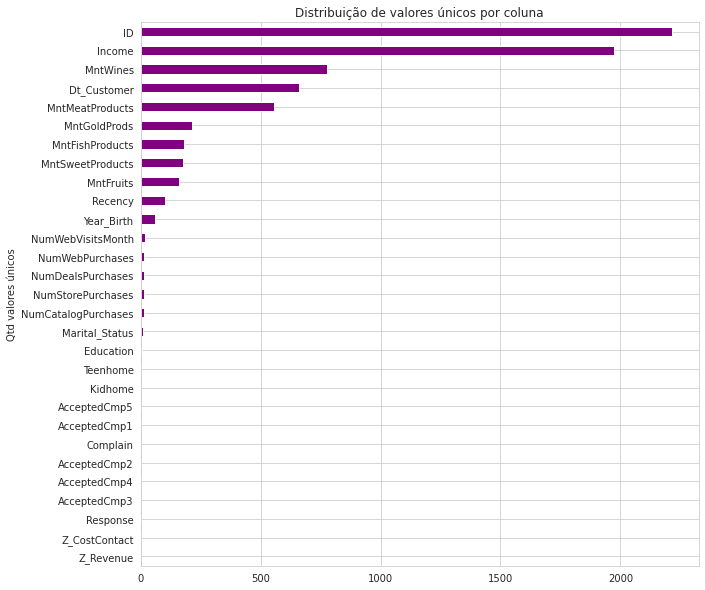

In [18]:
plt.figure(figsize = (10,10))
data.nunique().sort_values(ascending = True).plot(kind = 'barh', 
                                                       color = 'purple',
                                                       title = 'Distribuição de valores únicos por coluna',
                                                       xlabel = 'Qtd valores únicos',
                                                       ylabel = 'Colunas/Features')
plt.show()

In [19]:
#### Precisamos da coluna 'ID'? 
# Drop da coluna (save ID)

ids = data['ID']
data.drop(axis = 1, columns = 'ID', inplace = True)

In [20]:
# Novo shape do dataset (1 coluna a menos)

print_shape(data)

Shape do dataset (linhas, colunas): (2216, 28)


##### Distribuição das variáveis

#### 2.7 People

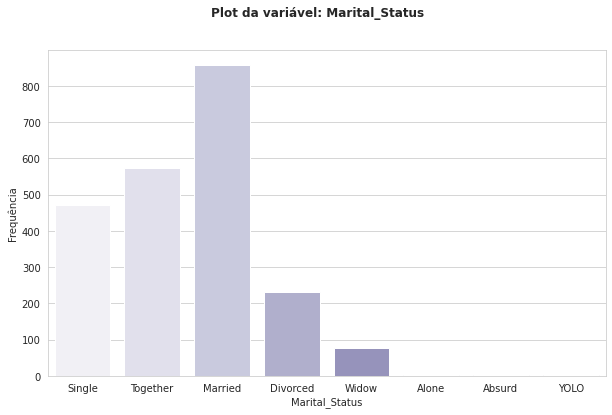

In [21]:
count_plot(df = data, col = 'Marital_Status')

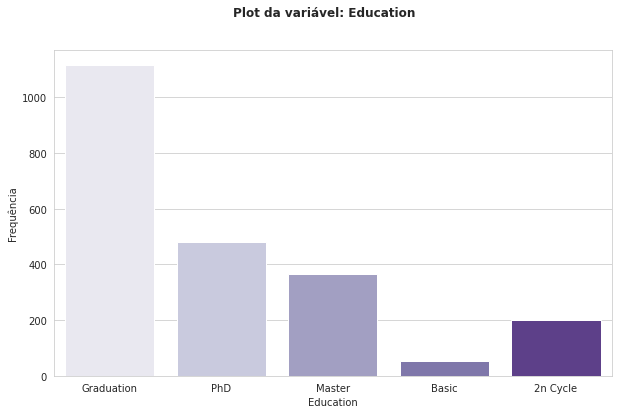

In [22]:
count_plot(df = data, col = 'Education')

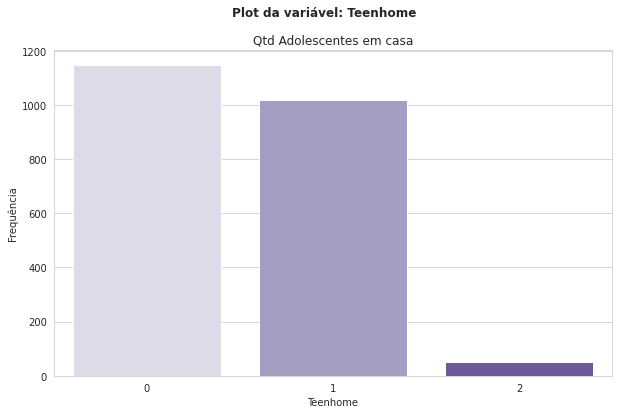

In [23]:
count_plot(df = data, col = 'Teenhome', title = 'Qtd Adolescentes em casa')

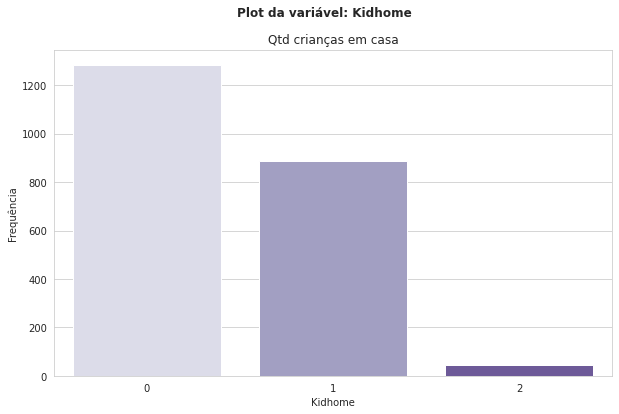

In [24]:
count_plot(df = data, col = 'Kidhome', title = 'Qtd crianças em casa')

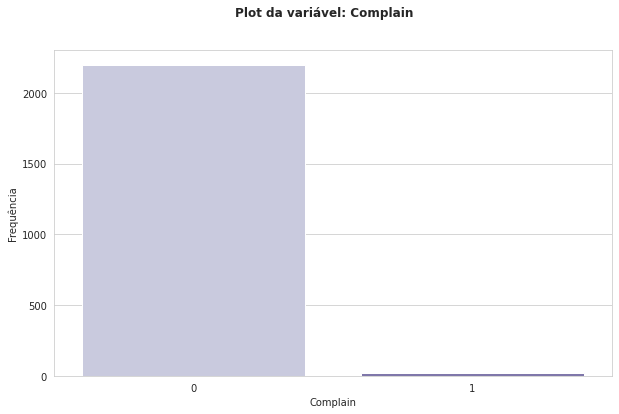

In [25]:
count_plot(df = data, col = 'Complain') # 1 if the customer complained in the last 2 years, 0 otherwise

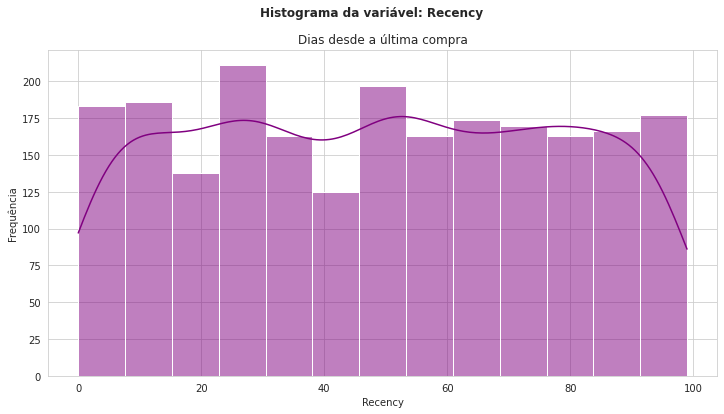

In [26]:
plot_hist(data,'Recency', 'Dias desde a última compra')

#### Criação da coluna Idade (Age) a partir do year_birth, considerando o ano máximo do Dataset (Dt_Customer):2014

In [27]:
data['Age'] = data['Year_Birth'].map(lambda x: 2014 - x)  # Cálculo da idade linha a linha

data[['Year_Birth','Age']].sample(10) # 10 exemplos aleatórios

,Year_Birth,Age
1831,1959,55
1443,1948,66
224,1962,52
248,1988,26
1547,1963,51
533,1962,52
9,1950,64
1939,1973,41
1719,1976,38
1605,1963,51


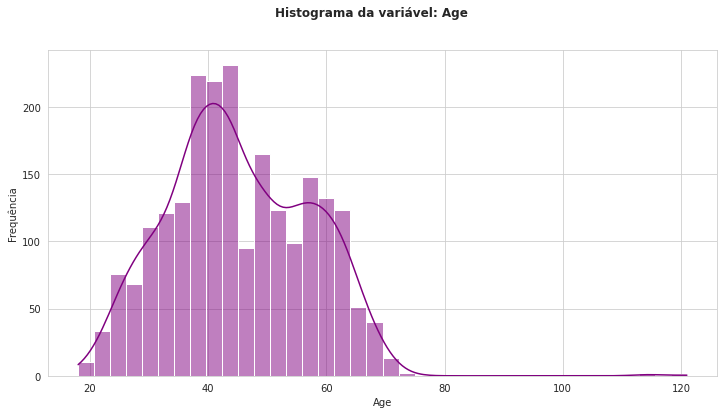

In [28]:
plot_hist(df = data, col = 'Age')

In [29]:
# Drop da coluna Year_Birth

data.drop(axis = 1, columns = ['Year_Birth'], inplace = True)

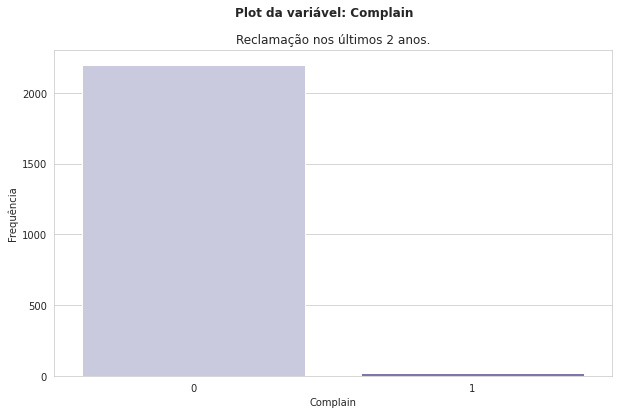

In [30]:
count_plot(data, 'Complain', 'Reclamação nos últimos 2 anos.')

### 3 Pré-Processamento

#### 3.1 LabelEncoding

Variáveis: Marital_Status e Education

As categorias serão codificadas, a cada rótulo será atribuído um número inteiro. 

Será utilizada a função LabelEncoder do Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

**Ex:**

**Education**

2n Cycle: 0

Basic: 1

Graduation: 2

Master: 3

PhD: 4

#### Tabela de Contingência

In [31]:
pd.crosstab(data['Marital_Status'],data['Education'])

Education,2n Cycle,Basic,Graduation,Master,PhD
Marital_Status,,,,,
Absurd,0,0,1,1,0
Alone,0,0,1,1,1
Divorced,23,1,119,37,52
Married,80,20,429,138,190
Single,36,18,246,75,96
Together,56,14,285,102,116
Widow,5,1,35,11,24
YOLO,0,0,0,0,2


In [32]:
# Salvando o DataFrame como backup

df = data.copy()

#### Education

In [33]:
LE_Education = LabelEncoder()

In [34]:
LE_Education.fit(data.Education)

LabelEncoder()

In [35]:
LE_Education.classes_

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [36]:
# Aplicando o objeto LabelEncoder treinado

data['Education'] = LE_Education.transform(data.Education)

In [37]:
data['Education'].value_counts()

2    1116
4     481
3     365
0     200
1      54
Name: Education, dtype: int64

#### Marital Status

In [38]:
LE_ms = LabelEncoder()

In [39]:
LE_ms.fit(data.Marital_Status)

LabelEncoder()

In [40]:
LE_ms.classes_

array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', 'YOLO'], dtype=object)

In [41]:
data['Marital_Status'] = LE_ms.transform(data['Marital_Status'])

In [42]:
data['Marital_Status'].value_counts()

3    857
5    573
4    471
2    232
6     76
1      3
0      2
7      2
Name: Marital_Status, dtype: int64

#### Date Customer

In [43]:
type(data['Dt_Customer'][0])

str

In [44]:
from datetime import datetime, date

In [45]:
data['Dt_Customer'].map(lambda d: datetime.strptime(d, '%d-%m-%Y').date()).max()

datetime.date(2014, 6, 29)

In [46]:
data['dias_cliente'] = data['Dt_Customer'].map(lambda d: (date(2014, 6, 29) - datetime.strptime(d, '%d-%m-%Y').date()).days)

In [47]:
data[['Dt_Customer','dias_cliente']].sample(10)

,Dt_Customer,dias_cliente
288,12-05-2014,48
1964,05-01-2014,175
1538,16-10-2012,621
1251,16-07-2013,348
451,16-02-2013,498
1044,30-07-2013,334
1384,06-10-2012,631
1238,04-07-2013,360
2199,26-06-2014,3
1704,02-10-2012,635


In [48]:
data.drop(axis = 1, columns = ['Dt_Customer'], inplace = True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Marital_Status       2216 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

#### Aplicar a Padronização aos dados (Média 0 e Desvio Padrão 1)

StandardScaler

In [50]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,dias_cliente
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,57,663
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,60,113
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,49,312
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,30,139
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,33,161


#### StandardScaler

In [51]:
Scaler = StandardScaler()

In [52]:
data_scaled = Scaler.fit_transform(data)

In [53]:
data_scaled[0:5]

array([[-3.50527253e-01,  2.54218121e-01,  2.34062698e-01,
        -8.23039324e-01, -9.28972240e-01,  3.10532125e-01,
         9.78225747e-01,  1.54942946e+00,  1.69022683e+00,
         2.45456767e+00,  1.48482696e+00,  8.50030572e-01,
         3.51713479e-01,  1.42855332e+00,  2.50471216e+00,
        -5.54142891e-01,  6.93231972e-01, -2.81772969e-01,
        -2.82704841e-01, -2.80838916e-01, -2.61661482e-01,
        -1.17148181e-01, -9.78120554e-02,  0.00000000e+00,
         0.00000000e+00,  2.37795178e+00,  9.86442928e-01,
         1.52912861e+00],
       [-3.50527253e-01,  2.54218121e-01, -2.34559480e-01,
         1.03993835e+00,  9.09065692e-01, -3.80509438e-01,
        -8.72023832e-01, -6.37327818e-01, -7.17986120e-01,
        -6.51037869e-01, -6.33880182e-01, -7.32867280e-01,
        -1.68231197e-01, -1.12588116e+00, -5.71082392e-01,
        -1.16951781e+00, -1.31574498e-01, -2.81772969e-01,
        -2.82704841e-01, -2.80838916e-01, -2.61661482e-01,
        -1.17148181e-01, -9.78

### 4. Criação do modelo

#### 4.1 - KMeans

In [54]:
km1 = KMeans(n_clusters = 5,
            max_iter = 100,
            random_state = 95)

In [55]:
km1.fit(data_scaled)

KMeans(max_iter=100, n_clusters=5, random_state=95)

In [56]:
labels = km1.labels_
labels

array([1, 0, 1, ..., 2, 2, 0], dtype=int32)

In [57]:
# Visualizando os centroides

km1.cluster_centers_

array([[ 1.70718057e-01,  2.56599717e-02, -3.37124659e-01,
         4.07360109e-01,  8.33623836e-01,  2.61865711e-02,
        -6.75666051e-01, -5.43774448e-01, -6.21346424e-01,
        -5.64502175e-01, -5.43965072e-01, -5.53048182e-01,
         4.03287010e-02, -6.24798063e-01, -6.39305862e-01,
        -6.35083062e-01,  1.37718659e-01, -1.17394653e-01,
        -2.04310079e-01, -2.80838916e-01, -2.38806669e-01,
        -8.48595777e-02,  1.77271316e-02,  0.00000000e+00,
         0.00000000e+00, -2.84782725e-01,  4.79966579e-01,
        -3.11128444e-01],
       [-8.93106472e-02,  6.47696578e-02,  8.81290519e-01,
        -7.33308748e-01, -5.32698007e-01,  2.00886238e-02,
         5.38636414e-01,  1.16479262e+00,  1.18478238e+00,
         1.25632014e+00,  1.07417804e+00,  6.29499854e-01,
        -4.41321405e-01,  3.69785426e-01,  1.07498503e+00,
         8.07162401e-01, -1.01029607e+00, -5.33349746e-02,
        -1.95091012e-01, -2.80838916e-01,  1.97251981e-01,
        -1.17148181e-01, -2.67

In [58]:
np.unique(km1.labels_, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([536, 436, 499, 169, 576]))

#### Objeto combinado com os labels

In [59]:
data['Cluster'] = km1.labels_

In [60]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,dias_cliente,Cluster
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,57,663,1
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,60,113,0
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,49,312,1
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,30,139,4
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,33,161,4


In [61]:
data['Cluster'].value_counts(normalize = True)*100

4    25.992780
0    24.187726
2    22.518051
1    19.675090
3     7.626354
Name: Cluster, dtype: float64

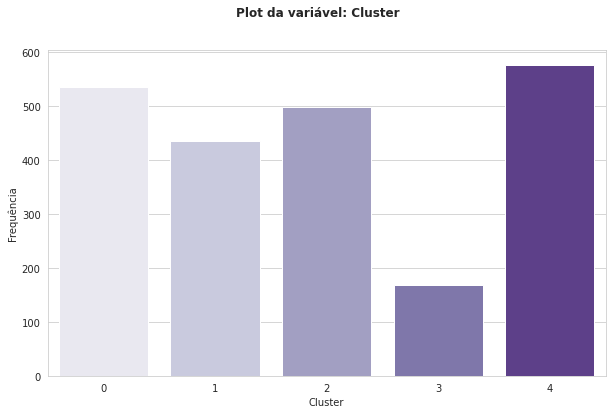

In [62]:
count_plot(data, 'Cluster')

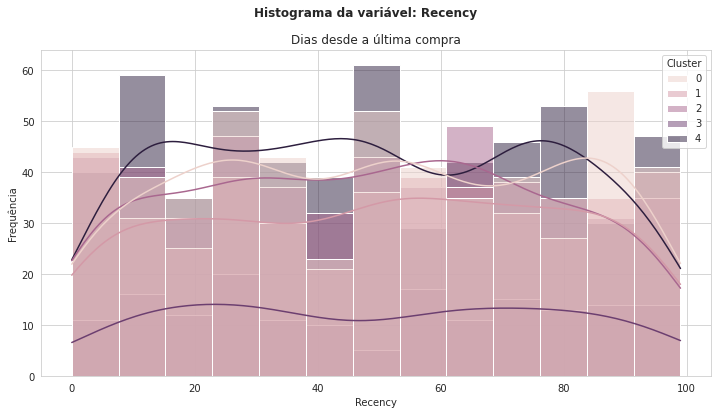

In [63]:
plot_hist(df = data, col = 'Recency', title = 'Dias desde a última compra', hue = data['Cluster'])

#### 4.2 Avaliação do Modelo

#### Inertia
Corresponde a distância de cada ponto ao seu centroide. Indica o quão bem o modelo realizou a clusterização. Quanto menor a inércia, melhor. Um modo de escolher o 'melhor' K para nosso modelo é testando com diferentes valores e vendo qual resulta na menor 'inertia'.

O modo mais conhecido de fazer isso é com o plot do k-elbow.

In [64]:
km1.inertia_

38650.58809720354

#### Silhouette Score - [Link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

A análise do silhouette score nos auxilia identificar a distância de separação entre os clusters encontrados.


In [65]:
silhouette_score(X = data_scaled, labels = labels, metric = 'euclidean')

0.09134291524545653

#### 4.3 DSBCAN (Density-Based Spatial Clustering of Applications with Noise) - [Link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [66]:
dbscan1 = DBSCAN()

In [67]:
dbscan1.fit(data_scaled)

DBSCAN()

In [68]:
dbscan_labels = dbscan1.labels_
dbscan_labels

array([-1, -1, -1, ..., -1, -1, -1])

In [69]:
print('Quantidade de Clusters: ', len(np.unique(dbscan_labels)))

Quantidade de Clusters:  1


In [70]:
np.unique(dbscan_labels, return_counts = True)

(array([-1]), array([2216]))

Nota: o grupo -1 significa ruído (noise)

### 5. k-elbow

In [71]:
# Loop para treinar e testar diferentes Ks com KMeans

inercia = []
silhouette = []
Ks = range(3, 20, 2) # 3,5,7, ... 19

for k in Ks:
    modelo = KMeans(n_clusters = k,
            max_iter = 100,
            random_state = 95)
    
    modelo.fit(data_scaled) # Treino
    
    inercia.append(modelo.inertia_)
    silhouette.append(silhouette_score(X = data_scaled, labels = modelo.labels_, metric = 'euclidean'))

In [72]:
dict_metrics = {'Algortimo' : 'Kmeans',
                'k' : Ks,
               'inertia' : inercia,
               'silhouette score' : silhouette,
               'pré-processamento' : 'scale'}

metricas_kmeans1 = pd.DataFrame(dict_metrics)
metricas_kmeans1

,Algortimo,k,inertia,silhouette score,pré-processamento
0,Kmeans,3,42652.136724,0.157878,scale
1,Kmeans,5,38650.588097,0.091343,scale
2,Kmeans,7,35544.426481,0.094544,scale
3,Kmeans,9,32768.353373,0.096394,scale
4,Kmeans,11,30696.925980,0.106857,scale
5,Kmeans,13,29382.737432,0.085485,scale
6,Kmeans,15,28126.939422,0.099325,scale
7,Kmeans,17,27311.885631,0.091393,scale
8,Kmeans,19,26509.056156,0.094556,scale


#### Plot k-elbow

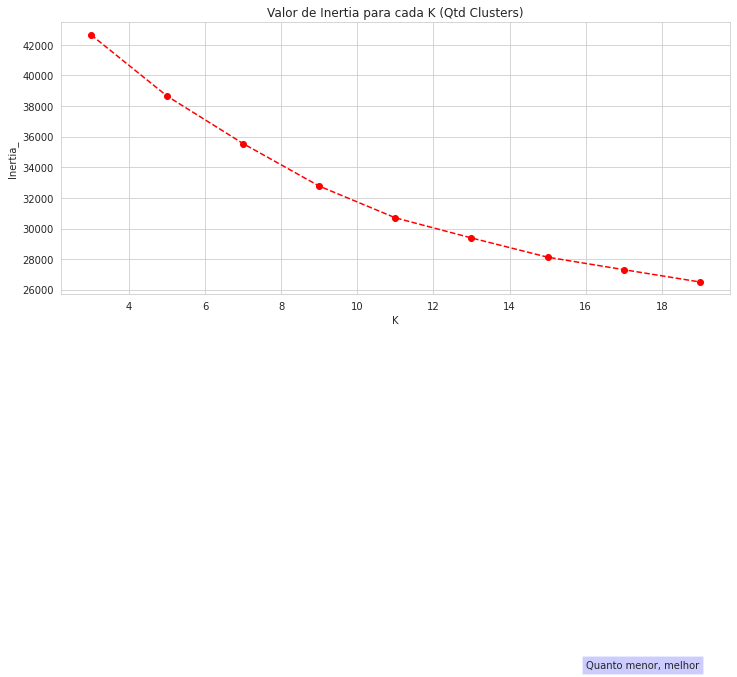

In [73]:
plt.figure(figsize= (12,5))
plt.plot(
    Ks,
    inercia,
    marker = 'o',
    linestyle = '--',
    color = 'red')
plt.text(x = 16, y = 1300, s = 'Quanto menor, melhor', bbox = dict(facecolor='blue', alpha=0.2))
plt.xlabel('K')
plt.ylabel('Inertia_')
plt.title('Valor de Inertia para cada K (Qtd Clusters)')
plt.show()

### 6. Aplicando PCA (Principal Component Analysis)

In [74]:
pca = PCA(n_components = 2)
pca.fit(data_scaled)

# Aplicando a Redução de Dimensionalidade
data_pca = pca.transform(data_scaled)

In [75]:
pca.explained_variance_ratio_

array([0.25206013, 0.08243433])

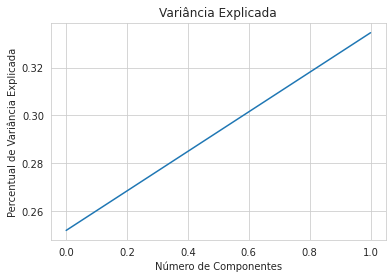

In [76]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada')
plt.show()

In [77]:
# Novo Shape do dataset

data_pca.shape

(2216, 2)

In [78]:
km2 = KMeans(n_clusters = 5,
            max_iter = 100,
            random_state = 95)

In [79]:
km2.fit(data_pca)

KMeans(max_iter=100, n_clusters=5, random_state=95)

In [80]:
km2_labels = km2.labels_
km2_labels

array([3, 0, 2, ..., 2, 1, 4], dtype=int32)

In [81]:
km2.inertia_

3007.3025597587675

In [82]:
centers_pca = km2.cluster_centers_
centers_pca

array([[-2.39529343, -0.86442495],
       [ 1.33701594,  2.04213238],
       [ 2.30328   , -0.73292382],
       [ 4.6502056 , -1.16830645],
       [-1.19349202,  1.09823303]])

In [83]:
dict_metrics2 = {'Algortimo' : 'Kmeans',
                'k' : 5,
               'inertia' : km2.inertia_,
               'silhouette score' : silhouette_score(X = data_pca, labels = km2.labels_, metric = 'euclidean'),
               'pré-processamento' : 'scale + PCA'}

metricas_kmeans2 = pd.DataFrame(dict_metrics2, index = [0])
metricas_kmeans2

,Algortimo,k,inertia,silhouette score,pré-processamento
0,Kmeans,5,3007.30256,0.403585,scale + PCA


In [84]:
df_metricas = metricas_kmeans1.append(metricas_kmeans2, ignore_index = True)
df_metricas

,Algortimo,k,inertia,silhouette score,pré-processamento
0,Kmeans,3,42652.136724,0.157878,scale
1,Kmeans,5,38650.588097,0.091343,scale
2,Kmeans,7,35544.426481,0.094544,scale
3,Kmeans,9,32768.353373,0.096394,scale
4,Kmeans,11,30696.925980,0.106857,scale
5,Kmeans,13,29382.737432,0.085485,scale
6,Kmeans,15,28126.939422,0.099325,scale
7,Kmeans,17,27311.885631,0.091393,scale
8,Kmeans,19,26509.056156,0.094556,scale
9,Kmeans,5,3007.302560,0.403585,scale + PCA


In [85]:
df_pca = pd.DataFrame(data = data_pca, columns = ['PCA1','PCA2'])
df_pca.head()

,PCA1,PCA2
0,3.831875,0.343230
1,-2.434302,-0.257243
2,1.611017,-0.293427
3,-2.559796,-1.567000
4,-0.479291,-0.168177


In [86]:
df_pca['Cluster'] = km2_labels

In [87]:
df_pca.head()

,PCA1,PCA2,Cluster
0,3.831875,0.343230,3
1,-2.434302,-0.257243,0
2,1.611017,-0.293427,2
3,-2.559796,-1.567000,0
4,-0.479291,-0.168177,4


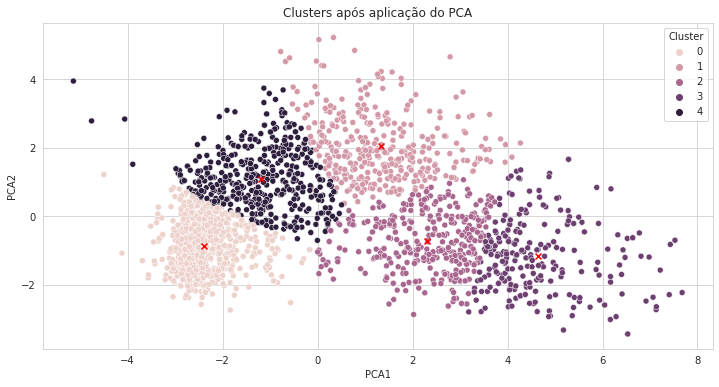

In [88]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df_pca,
            x = 'PCA1', 
            y = 'PCA2',
            hue = 'Cluster',
           markers = 'o')
plt.title('Clusters após aplicação do PCA')
plt.scatter(x = centers_pca[:,0], y = centers_pca[:,1], marker ='x', color = 'red') # Centroide
plt.show()

### 7. Feature Engineering e Remoção de Outliers

* Marital Status: 
* Kidhome e Teenhome
* Education:
* Age:
* income:

In [89]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age'],
      dtype='object')

In [90]:
# Aplicando, novamente a transformação 

df['dias_cliente'] = df['Dt_Customer'].map(lambda d: (date(2014, 6, 29) - datetime.strptime(d, '%d-%m-%Y').date()).days)

#### Marital Status
Considerando:
* Married e Together = 1 (casados, juntos)
* Todos os outros = 0 (solteiro, divorciado, etc ...)

In [91]:
df['ms'] = df['Marital_Status'].map(lambda x: 1 if x in ['Married','Together'] else 0)

In [92]:
df['ms'].value_counts(normalize = True)*100

1    64.530686
0    35.469314
Name: ms, dtype: float64

#### Kidhome e Teen home

* Se kid+teen > 0, então há filhos (1), caso contrário, não há (0).

In [93]:
df['Children'] = np.where(df['Kidhome'] + df['Teenhome'] > 0, 1, 0)

In [94]:
df['Children'].value_counts(normalize = True)*100

1    71.435018
0    28.564982
Name: Children, dtype: float64

#### Education

In [95]:
df['degree'] = df['Education'].map(lambda x: 0 if x in ['Basic','2n Cycle'] else 1)

#### Age
As idades vão de 18 a 121. Criaremos 4 grupos.

In [96]:
age_range = [0, 25, 40, 60, 125]
label = [0,1,2,3]

In [97]:
df['range_age'] = pd.cut(df['Age'], bins = age_range, labels = label)

In [98]:
df['range_age'].value_counts(normalize = True)*100

2    50.000000
1    33.889892
3    12.048736
0     4.061372
Name: range_age, dtype: float64

#### Income: Tratando os outliers

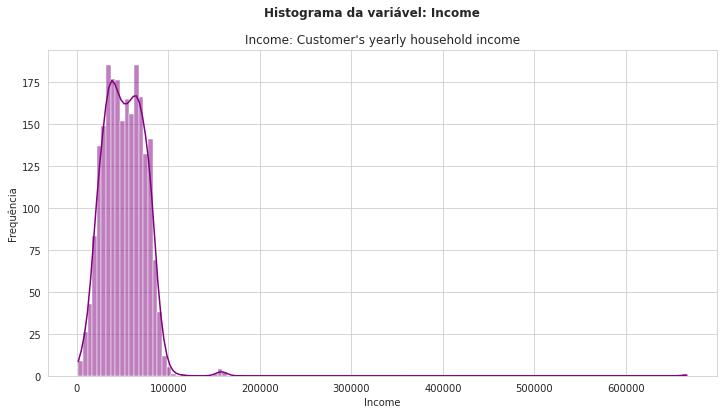

In [99]:
plot_hist(df,'Income', "Income: Customer's yearly household income")

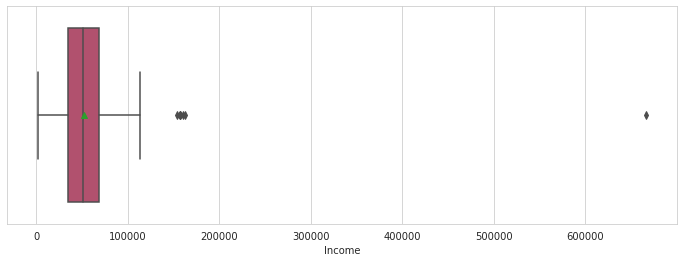

In [100]:
plt.figure(figsize = (12,4))
sns.boxplot(x = df['Income'], orient = 'h', palette = 'flare', showmeans = True)
plt.show()

In [101]:
five_pct = df['Income'].quantile(q = 0.995)
five_pct

102145.75000000003

In [102]:
df[df['Income'] >= five_pct]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,dias_cliente,ms,Children,degree,range_age
164,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,...,0,3,11,0,41,120,1,1,1,2
203,PhD,Together,102160.0,0,0,02-11-2012,54,763,29,138,...,0,3,11,1,37,604,1,0,1,1
252,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,148,444,...,0,3,11,1,40,450,0,0,1,1
617,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,...,0,3,11,0,38,391,1,1,1,1
646,Graduation,Together,105471.0,0,0,21-01-2013,36,1009,181,104,...,0,3,11,1,44,524,1,0,1,2
655,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,...,0,3,11,0,39,142,0,0,1,1
687,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,...,0,3,11,0,32,694,1,0,1,1
1300,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,...,0,3,11,0,43,390,1,1,1,2
1653,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,...,0,3,11,0,37,426,1,0,1,1
1898,PhD,Single,113734.0,0,0,28-05-2014,9,6,2,3,...,0,3,11,0,69,32,0,0,1,3


In [103]:
n_linhas = df.shape[0]
n_linhas

2216

Nota-se que todos possuem mais de 30 anos e possuem graduação ou um nível superior. Iremos excluir estes registros!

In [104]:
df = df[df['Income'] <= five_pct]

In [105]:
print('Quantidade de registros excluídos: ', n_linhas - df.shape[0])

Quantidade de registros excluídos:  12


#### Excluindo colunas

In [106]:
columns_to_drop = ['Marital_Status','Dt_Customer','Kidhome','Teenhome','Education','Age']

In [107]:
df.shape

(2204, 33)

In [108]:
df.drop(columns = columns_to_drop, inplace = True)

 #### Aplicando Scale

In [109]:
scl = StandardScaler()

In [110]:
scl.fit(df)

StandardScaler()

In [111]:
df_std = pd.DataFrame(scl.transform(df), columns = df.columns)

In [112]:
df_std.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dias_cliente,ms,Children,degree,range_age
0,0.320593,0.309177,0.976354,1.555798,1.747067,2.454250,1.505352,0.850765,0.360649,1.455029,...,-0.11547,-0.098081,0.0,0.0,2.383021,1.529130,-1.347151,-1.589465,0.360911,0.410038
1,-0.252031,-0.382170,-0.874181,-0.638660,-0.731272,-0.652072,-0.637593,-0.734834,-0.169972,-1.145549,...,-0.11547,-0.098081,0.0,0.0,-0.419635,-1.187508,-1.347151,0.629142,0.360911,0.410038
2,0.974833,-0.796978,0.356543,0.572076,-0.175940,1.339629,-0.144962,-0.038717,-0.700593,1.455029,...,-0.11547,-0.098081,0.0,0.0,-0.419635,-0.204579,0.742307,-1.589465,0.360911,0.410038
3,-1.208412,-0.796978,-0.874181,-0.562989,-0.667019,-0.505893,-0.588330,-0.754170,-0.169972,-0.774038,...,-0.11547,-0.098081,0.0,0.0,-0.419635,-1.059085,0.742307,0.629142,0.360911,-0.961317
4,0.328118,1.553601,-0.393753,0.420734,-0.217246,0.151917,0.002827,-0.560805,1.421891,0.340496,...,-0.11547,-0.098081,0.0,0.0,-0.419635,-0.950420,0.742307,0.629142,0.360911,-0.961317


#### KMeans V3

In [113]:
km3 = KMeans(n_clusters = 5,
            max_iter = 100,
            random_state = 95)

In [114]:
km3.fit(df_std)

KMeans(max_iter=100, n_clusters=5, random_state=95)

In [115]:
labels3 = km3.labels_
labels3

array([2, 1, 2, ..., 4, 4, 1], dtype=int32)

In [116]:
centers3 = km3.cluster_centers_

In [117]:
dict_metrics3 = {'Algortimo' : 'Kmeans',
                'k' : 5,
               'inertia' : km3.inertia_,
               'silhouette score' : silhouette_score(X = df_std, labels = labels3, metric = 'euclidean'),
               'pré-processamento' : 'scale + remoção Outlier'}

metricas_kmeans3 = pd.DataFrame(dict_metrics3, index = [0])
metricas_kmeans3

,Algortimo,k,inertia,silhouette score,pré-processamento
0,Kmeans,5,35321.304578,0.172456,scale + remoção Outlier


In [118]:
df_metricas = df_metricas.append(metricas_kmeans3, ignore_index = True)
df_metricas

,Algortimo,k,inertia,silhouette score,pré-processamento
0,Kmeans,3,42652.136724,0.157878,scale
1,Kmeans,5,38650.588097,0.091343,scale
2,Kmeans,7,35544.426481,0.094544,scale
3,Kmeans,9,32768.353373,0.096394,scale
4,Kmeans,11,30696.925980,0.106857,scale
5,Kmeans,13,29382.737432,0.085485,scale
6,Kmeans,15,28126.939422,0.099325,scale
7,Kmeans,17,27311.885631,0.091393,scale
8,Kmeans,19,26509.056156,0.094556,scale
9,Kmeans,5,3007.302560,0.403585,scale + PCA
